# Capstone Project

#### Autors: Jinming Chen

## Abstract

## Introduction

In [66]:
#Import libraries and packages
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors, preprocessing, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#Read in the csv from Github
df1821 = pd.read_csv("https://raw.githubusercontent.com/JinmingChen12/Capstone/main/NBA2018-2021.txt", sep=',')
                 
#View the data frame
df1821.head()

,Season,player,pos,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,...,draft,pick,conference,conference_strength,points,rebounds,assists,steals,FG%,3p%
0,2018-2019,Rawle Alkins,SG,8.90%,8.50,10.00,6' 2'',6' 4'',8' 3'',217.4,...,0,NaN,Pac-12,6.0,11.8,4.9,2.2,1.0,0.450,0.365
1,2018-2019,Grayson Allen,SG,5.55%,8.25,10.00,6' 3'',6' 4'',8' 1'',198.0,...,1,21.0,ACC,5.0,14.1,3.2,3.0,1.0,0.430,0.380
2,2018-2019,Kostas Antetokounmpo,PF,5.00%,9.25,9.50,6' 9'',6' 10'',9' 2'',194.8,...,1,20.0,ACC,5.0,5.2,2.9,0.4,0.2,0.574,0.133
3,2018-2019,Udoka Azubuike,C,7.95%,9.50,10.00,6' 10'',7' 0'',9' 4'',273.8,...,1,27.0,Big 12,3.0,12.3,7.9,0.7,0.5,0.416,0.000
4,2018-2019,Mohamed Bamba,C,6.20%,9.75,10.25,6' 11'',7' 0'',9' 7'',225.6,...,1,6.0,SEC,2.0,12.9,10.5,0.5,0.2,0.541,0.275


In [2]:
def feetinchtocm(feetinch):
    if feetinch != 'None':
        pattern = re.compile(r'[0-9]+')
        feetinch = re.findall(pattern, feetinch)
        return int(feetinch[0])*30.48+int(feetinch[1])*2.54
    else:
        return 'None'

In [3]:
df1821.height_wo_shoes = df1821.height_wo_shoes.apply(lambda x: feetinchtocm(x))
df1821.height_w_shoes = df1821.height_w_shoes.apply(lambda x: feetinchtocm(x))
df1821.standing_reach = df1821.standing_reach.apply(lambda x: feetinchtocm(x))
df1821.wingspan = df1821.wingspan.apply(lambda x: feetinchtocm(x))

In [4]:
df1821

,Season,player,pos,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,...,draft,pick,conference,conference_strength,points,rebounds,assists,steals,FG%,3p%
0,2018-2019,Rawle Alkins,SG,8.90%,8.50,10.00,187.96,193.04,251.46,217.4,...,0,NaN,Pac-12,6.0,11.8,4.9,2.2,1.00,0.450,0.365
1,2018-2019,Grayson Allen,SG,5.55%,8.25,10.00,190.50,193.04,246.38,198.0,...,1,21.0,ACC,5.0,14.1,3.2,3.0,1.00,0.430,0.380
2,2018-2019,Kostas Antetokounmpo,PF,5.00%,9.25,9.50,205.74,208.28,279.40,194.8,...,1,20.0,ACC,5.0,5.2,2.9,0.4,0.20,0.574,0.133
3,2018-2019,Udoka Azubuike,C,7.95%,9.50,10.00,208.28,213.36,284.48,273.8,...,1,27.0,Big 12,3.0,12.3,7.9,0.7,0.50,0.416,0.000
4,2018-2019,Mohamed Bamba,C,6.20%,9.75,10.25,210.82,213.36,292.10,225.6,...,1,6.0,SEC,2.0,12.9,10.5,0.5,0.20,0.541,0.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2020-2021,Immanuel Quickley,SG,8.20%,8.00,8.75,187.96,190.50,251.46,185.8,...,1,25.0,SEC,2.0,10.8,2.0,2.0,1.00,0.400,0.400
180,2020-2021,Josh Green,SG-SF,6.80%,8.00,8.75,193.04,195.58,256.54,214.0,...,1,18.0,Big Ten,1.0,2.3,1.9,0.7,0.33,0.441,0.148
181,2020-2021,Myles Powell,PG-SG,15.80%,8.00,9.00,182.88,185.42,251.46,194.0,...,0,NaN,ACC,5.0,2.1,1.0,0.2,0.10,0.344,0.233
182,2020-2021,Skylar Mays,SG,7.40%,8.00,9.75,190.50,193.04,251.46,204.0,...,1,50.0,Pac-12,6.0,3.5,0.9,0.8,0.30,0.466,0.357


In [5]:
df1821.isnull().sum()

Season                  0
player                  0
pos                     0
body_fat                0
hand_length             0
hand_width              0
height_wo_shoes         0
height_w_shoes          0
standing_reach          0
weight                  0
wingspan                0
age                     0
draft                   0
pick                   59
conference              0
conference_strength     0
points                  0
rebounds                0
assists                 0
steals                  0
FG%                     0
3p%                     1
dtype: int64

In [6]:
# delete % in body_fat
df1821["body_fat"] = df1821["body_fat"].str.replace("%", "")

In [7]:
df1821

,Season,player,pos,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,...,draft,pick,conference,conference_strength,points,rebounds,assists,steals,FG%,3p%
0,2018-2019,Rawle Alkins,SG,8.90,8.50,10.00,187.96,193.04,251.46,217.4,...,0,NaN,Pac-12,6.0,11.8,4.9,2.2,1.00,0.450,0.365
1,2018-2019,Grayson Allen,SG,5.55,8.25,10.00,190.50,193.04,246.38,198.0,...,1,21.0,ACC,5.0,14.1,3.2,3.0,1.00,0.430,0.380
2,2018-2019,Kostas Antetokounmpo,PF,5.00,9.25,9.50,205.74,208.28,279.40,194.8,...,1,20.0,ACC,5.0,5.2,2.9,0.4,0.20,0.574,0.133
3,2018-2019,Udoka Azubuike,C,7.95,9.50,10.00,208.28,213.36,284.48,273.8,...,1,27.0,Big 12,3.0,12.3,7.9,0.7,0.50,0.416,0.000
4,2018-2019,Mohamed Bamba,C,6.20,9.75,10.25,210.82,213.36,292.10,225.6,...,1,6.0,SEC,2.0,12.9,10.5,0.5,0.20,0.541,0.275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2020-2021,Immanuel Quickley,SG,8.20,8.00,8.75,187.96,190.50,251.46,185.8,...,1,25.0,SEC,2.0,10.8,2.0,2.0,1.00,0.400,0.400
180,2020-2021,Josh Green,SG-SF,6.80,8.00,8.75,193.04,195.58,256.54,214.0,...,1,18.0,Big Ten,1.0,2.3,1.9,0.7,0.33,0.441,0.148
181,2020-2021,Myles Powell,PG-SG,15.80,8.00,9.00,182.88,185.42,251.46,194.0,...,0,NaN,ACC,5.0,2.1,1.0,0.2,0.10,0.344,0.233
182,2020-2021,Skylar Mays,SG,7.40,8.00,9.75,190.50,193.04,251.46,204.0,...,1,50.0,Pac-12,6.0,3.5,0.9,0.8,0.30,0.466,0.357


In [8]:
df1821.dtypes

Season                  object
player                  object
pos                     object
body_fat                object
hand_length            float64
hand_width             float64
height_wo_shoes        float64
height_w_shoes         float64
standing_reach         float64
weight                 float64
wingspan               float64
age                      int64
draft                    int64
pick                   float64
conference              object
conference_strength    float64
points                 float64
rebounds               float64
assists                float64
steals                 float64
FG%                    float64
3p%                    float64
dtype: object

In [9]:
df1821["body_fat"] = pd.to_numeric(df1821["body_fat"])
df1821["FG%"] = pd.to_numeric(df1821["FG%"])

In [10]:
#Find the count, mean, standard deviation, minimum, maximum, 25%, 50% and 75% of each variable in the dataset.
df1821.describe()

,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,wingspan,age,draft,pick,conference_strength,points,rebounds,assists,steals,FG%,3p%
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,125.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,183.000000
mean,6.465326,8.758152,9.448370,195.538587,198.810217,261.426739,211.444565,208.500870,20.559783,0.679348,33.488000,3.763587,8.648913,3.730435,1.547826,0.520196,0.447049,0.360087
std,2.274012,0.514743,0.688546,8.394779,8.427183,12.697133,23.655269,10.424791,1.190450,0.468001,16.167778,2.674476,4.965003,2.383286,1.303629,0.361896,0.089596,0.671871
min,0.000000,7.500000,7.750000,175.260000,177.800000,231.140000,167.800000,182.880000,19.000000,0.000000,4.000000,1.000000,0.500000,0.100000,0.000000,-0.400000,0.125000,0.000000
25%,5.000000,8.500000,9.000000,190.500000,193.040000,251.460000,194.800000,200.660000,20.000000,0.000000,20.000000,2.000000,4.000000,2.000000,0.600000,0.200000,0.400000,0.300000
50%,6.050000,8.750000,9.500000,195.580000,198.120000,261.620000,207.400000,208.280000,20.000000,1.000000,34.000000,3.000000,8.300000,3.300000,1.200000,0.425000,0.439000,0.333000
75%,7.600000,9.000000,10.000000,200.660000,203.835000,269.875000,225.650000,215.900000,21.000000,1.000000,48.000000,5.000000,12.300000,5.000000,2.100000,0.800000,0.489000,0.378000
max,15.800000,10.500000,11.000000,226.060000,231.140000,309.880000,303.000000,248.920000,23.000000,1.000000,59.000000,20.000000,24.200000,11.100000,8.900000,1.900000,0.746000,9.284000


In [11]:
#Find the number of unique values for each variable
df1821.nunique(axis=0)

Season                   3
player                 174
pos                     12
body_fat                95
hand_length             13
hand_width              14
height_wo_shoes         18
height_w_shoes          17
standing_reach          24
weight                 152
wingspan                21
age                      5
draft                    2
pick                    56
conference              11
conference_strength     12
points                 108
rebounds                71
assists                 49
steals                  25
FG%                    115
3p%                     99
dtype: int64

In [12]:
df1821.dtypes

Season                  object
player                  object
pos                     object
body_fat               float64
hand_length            float64
hand_width             float64
height_wo_shoes        float64
height_w_shoes         float64
standing_reach         float64
weight                 float64
wingspan               float64
age                      int64
draft                    int64
pick                   float64
conference              object
conference_strength    float64
points                 float64
rebounds               float64
assists                float64
steals                 float64
FG%                    float64
3p%                    float64
dtype: object

In [13]:
#Create lists of numerical and categorical attributes

col_cat=['Season', 'player', 'pos', 'draft', 'conference']

col_num=['body_fat','hand_length','hand_width','height_wo_shoes','height_w_shoes','standing_reach','weight','wingspan', 'pick',
         'age','conference_strength','points','rebounds','assists','steals','FG%','3p%']

print("# of categorical attributes:%s" %len(col_cat))
print("# of numerical attributes:%s" %len(col_num))

# of categorical attributes:5
# of numerical attributes:17


#### Histograms, Bar Charts, Boxplots and Correlation Matrix
#### Plot a histogram for each of our numerical attributes.

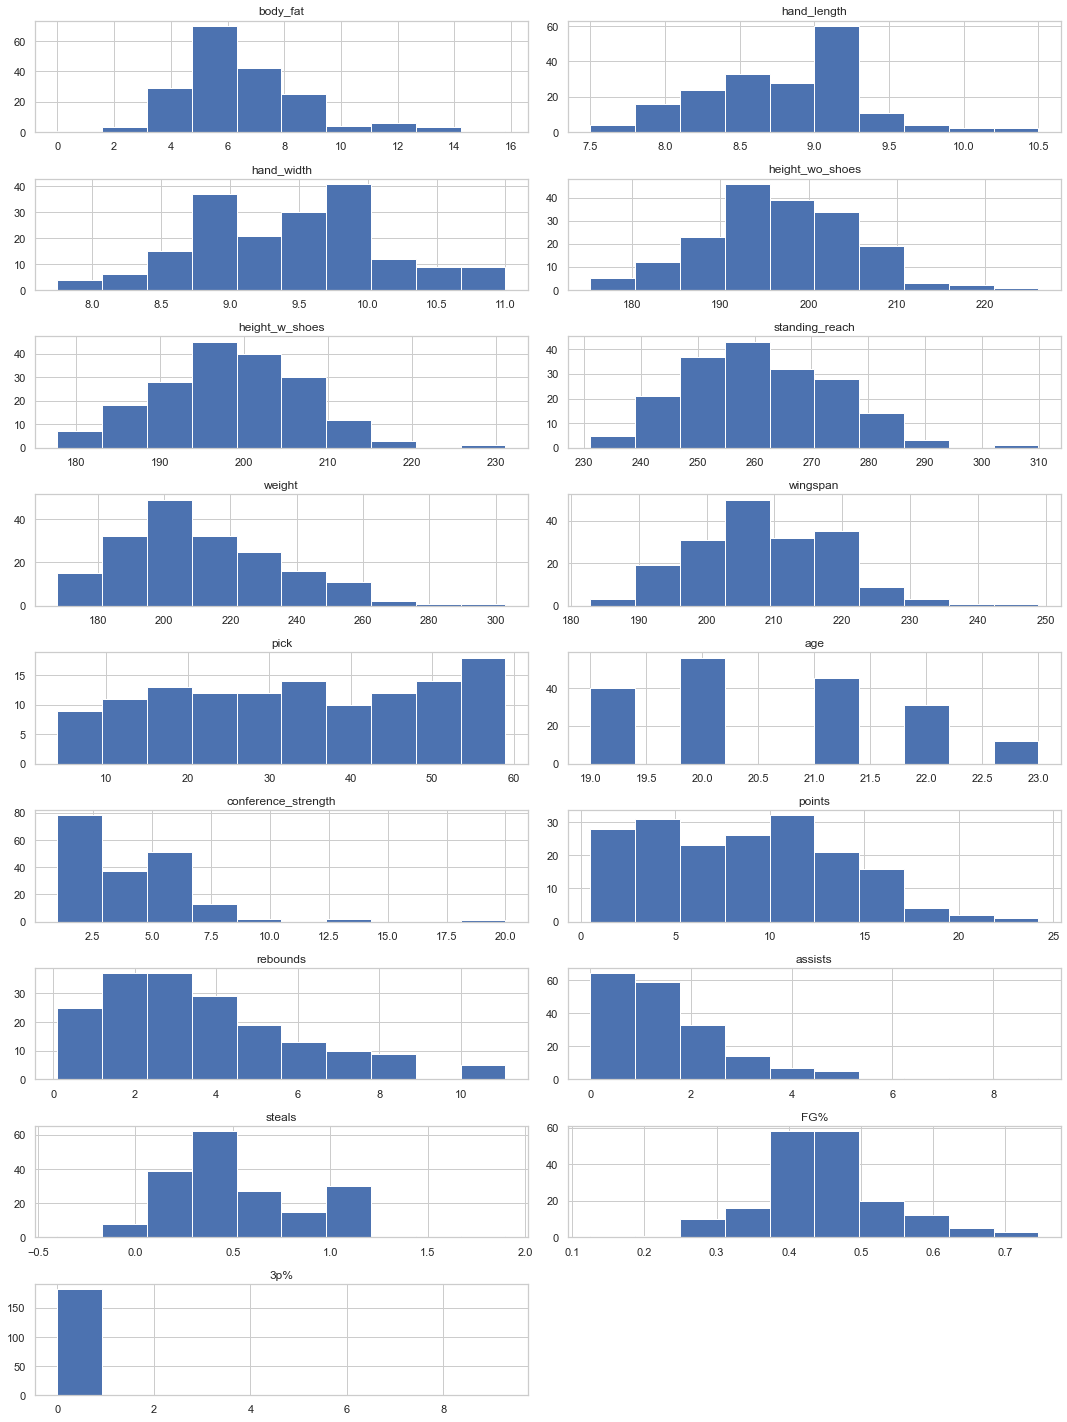

In [14]:
#Set plot parameters
plt.rcParams.update({'font.size': 12,'figure.figsize':(15,35)}) 

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numerical column 
for k in col_num :   
    plt.subplot(16,2,j) 
    plt.hist(df1821[k])
    plt.title('%s' %k)
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()

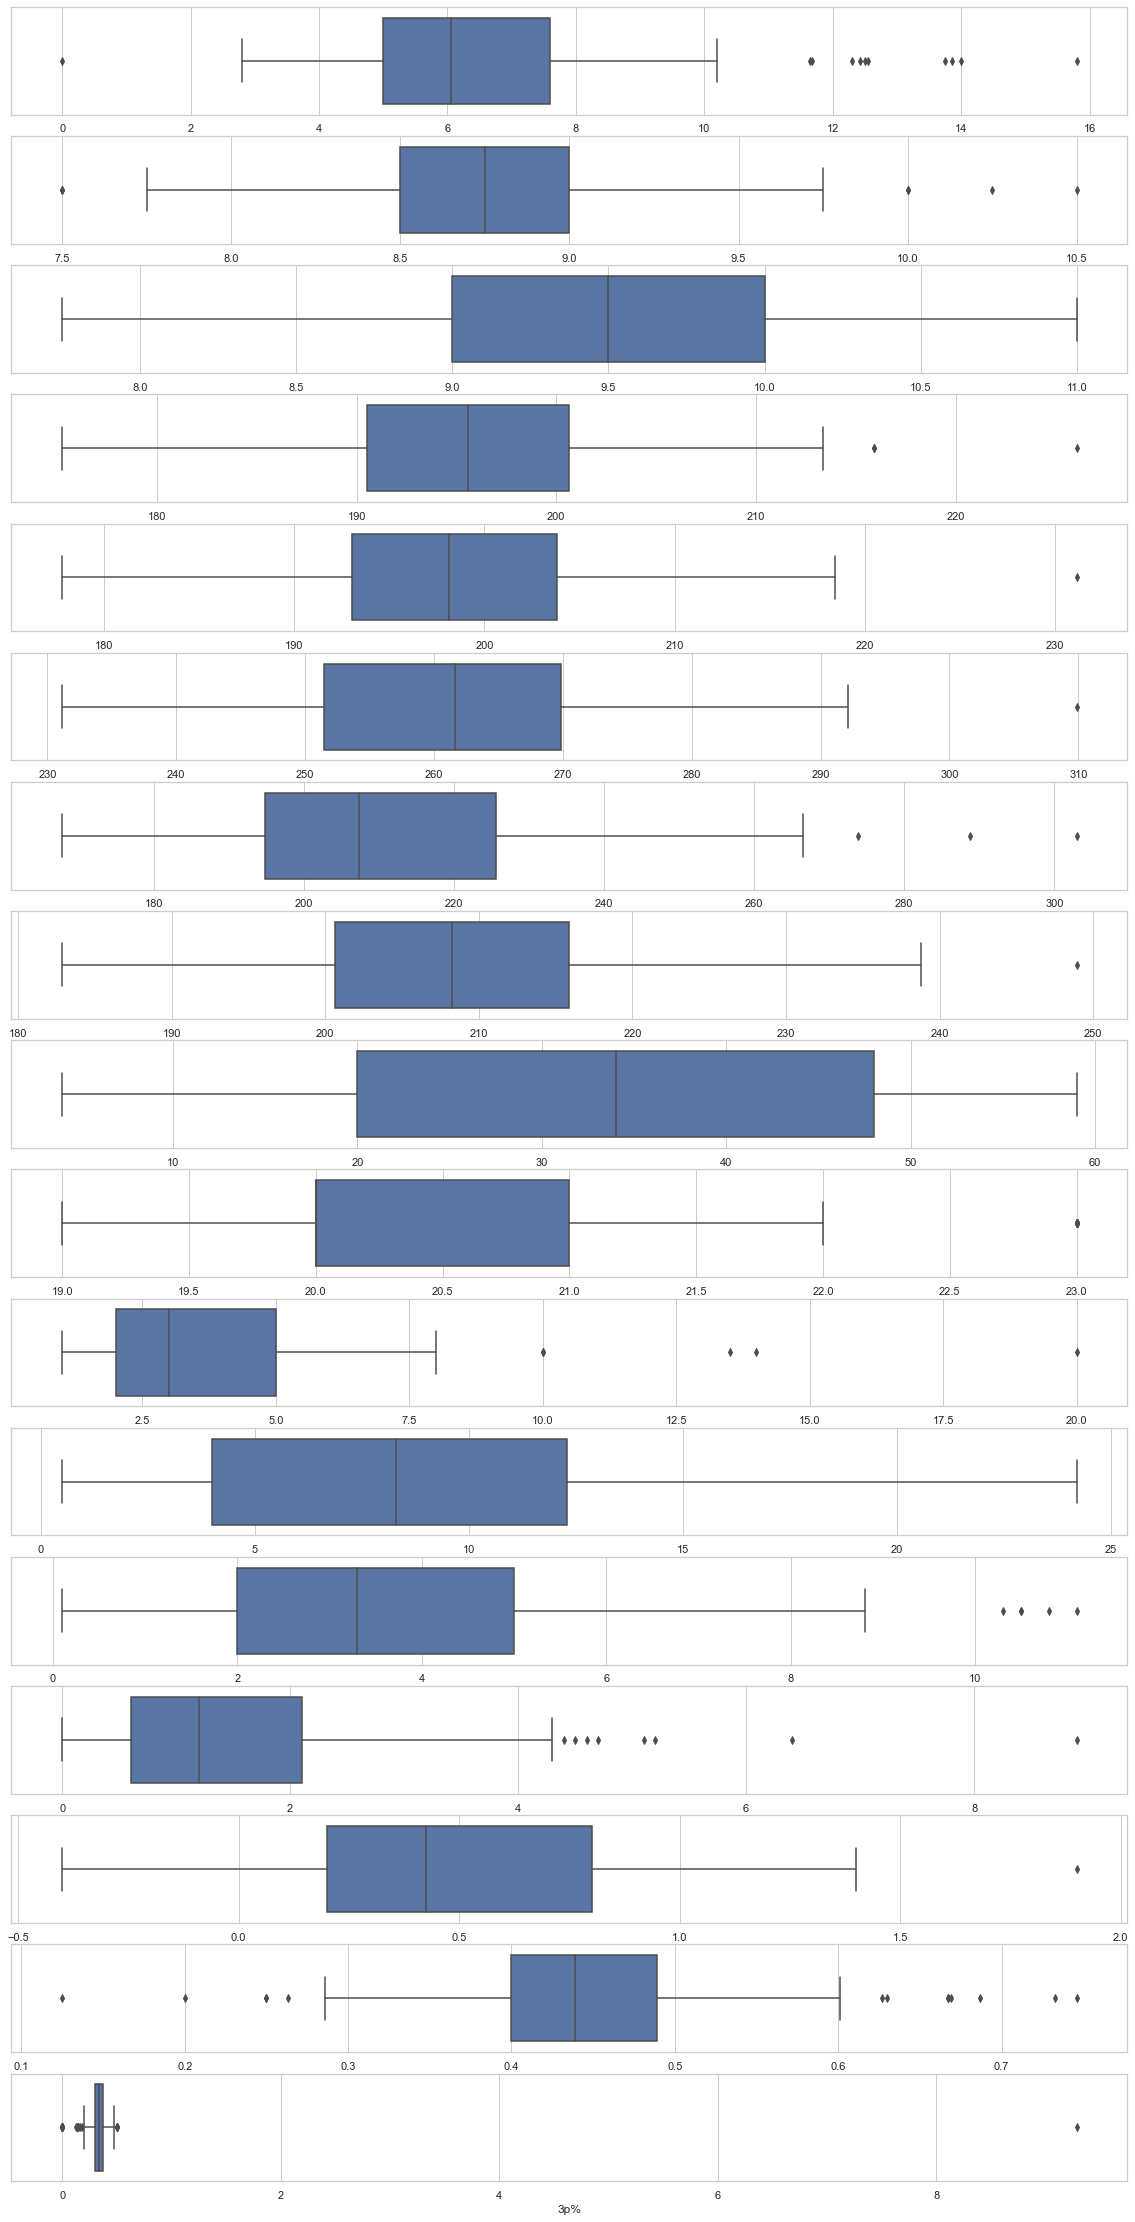

In [15]:
#Define a figure to which we will add a boxplot for each of our attributes
plt.figure(figsize=(20,40))

#Ignore warnings
np.warnings.filterwarnings('ignore')

#Use an index to identify the spot of the subplot
j=1

#For each numeric variable display a boxplot
for k in col_num :    
    plt.subplot(17,1,j) 
    sns.boxplot(x=k, data=df1821);
    j=j+1

#Show results    
plt.show()

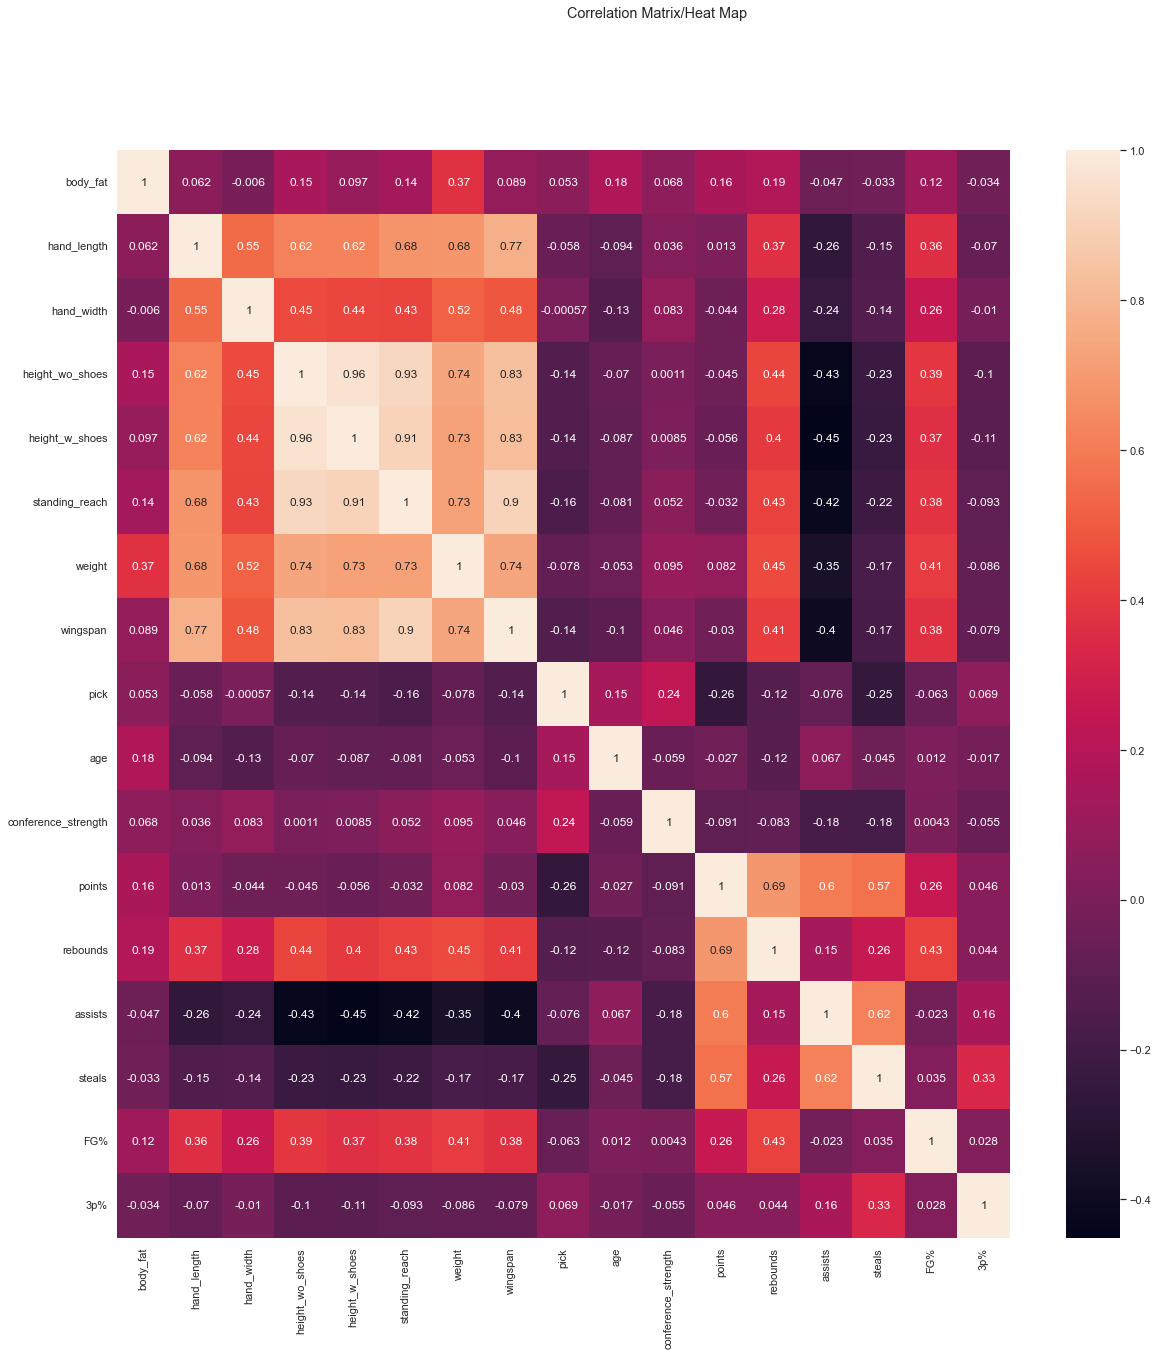

In [16]:
#Graph heat map for correlation
corr_num=df1821[col_num].corr()
fig = plt.figure(figsize=(20, 20))
sns.heatmap(corr_num, annot=True);
fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

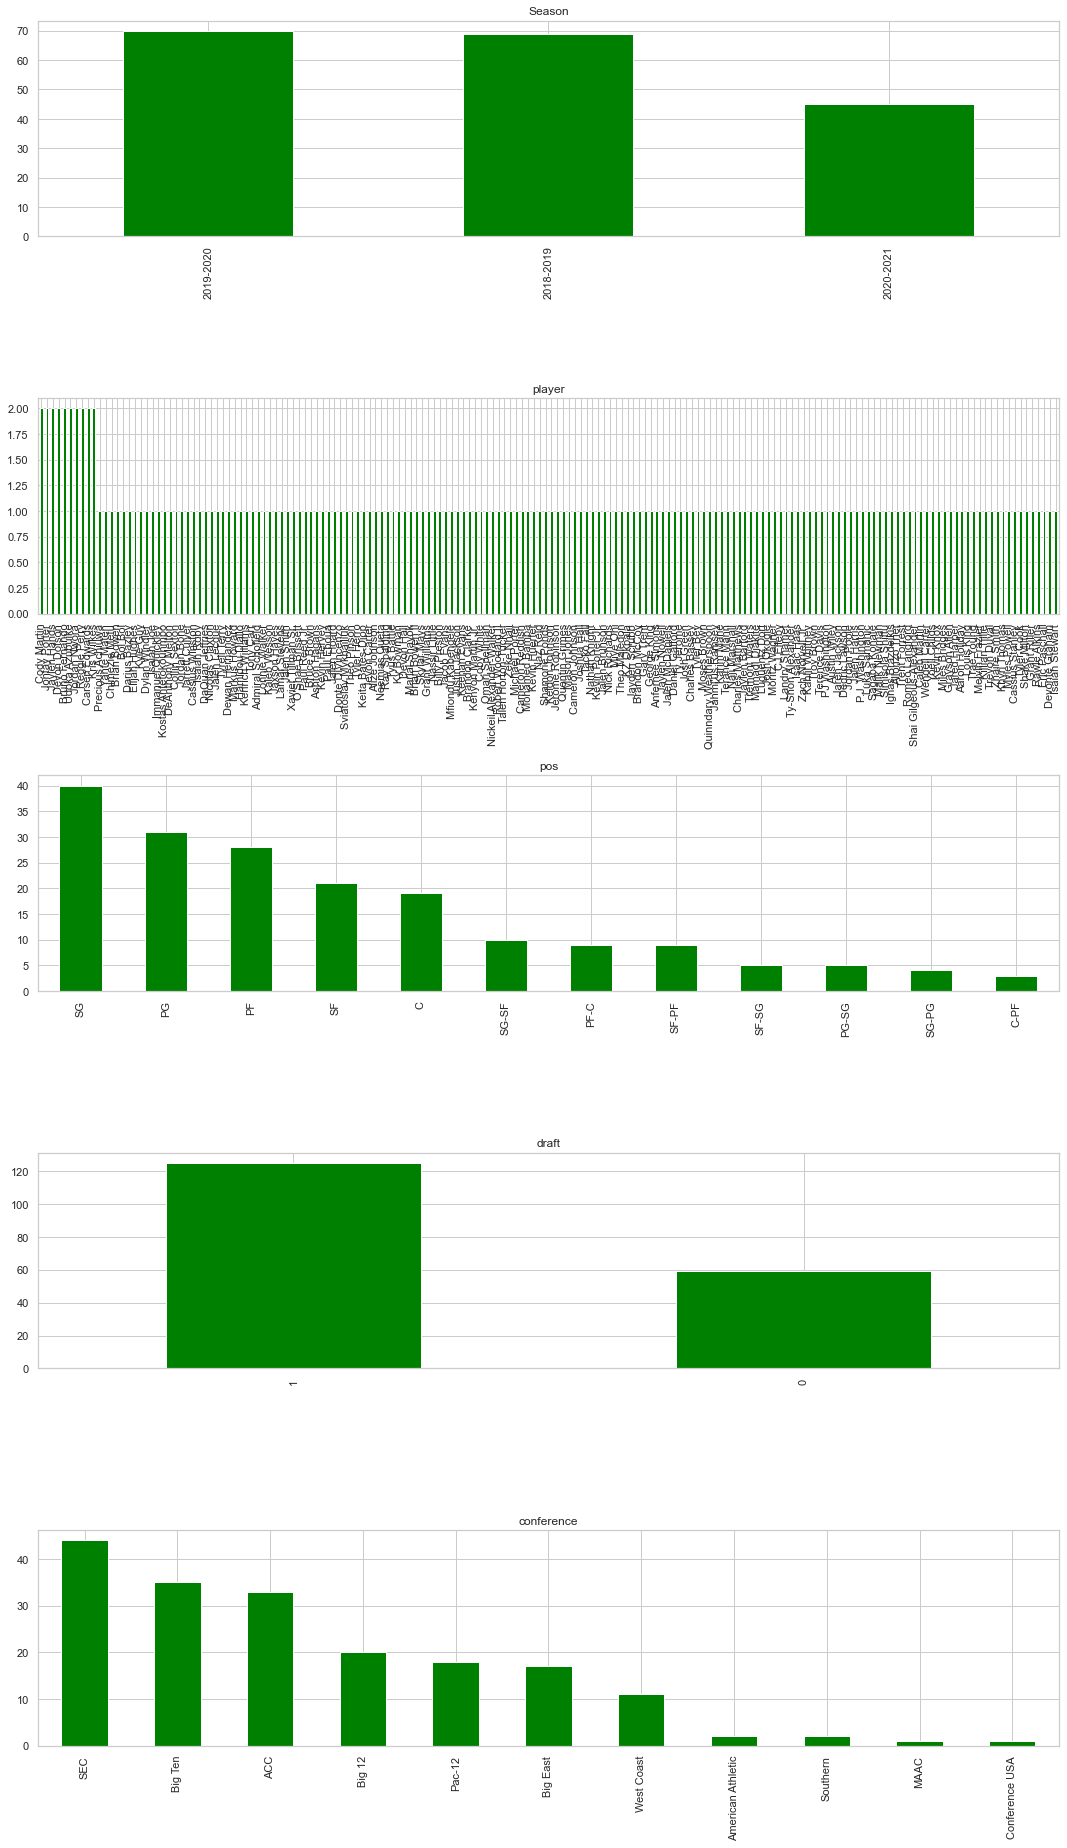

In [17]:
#Use an index to identify the spot of the subplot
j=1

#For each categorical column 
for k in col_cat :   
    plt.subplot(7,1,j) 
    df1821[k].value_counts().plot(kind='bar', color='green');
    plt.title('%s' %k)
    
#Add 1 to go to the next subplot space
    j=j+1 

plt.tight_layout()

#Show results    
plt.show()


In [18]:
#Create dummy variables for categorical variables
df2 = pd.get_dummies(df1821,columns=['Season', 'pos', 'conference'],
drop_first=False)

#Check results
df2.head()

,player,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,wingspan,age,...,conference_American Athletic,conference_Big 12,conference_Big East,conference_Big Ten,conference_Conference USA,conference_MAAC,conference_Pac-12,conference_SEC,conference_Southern,conference_West Coast
0,Rawle Alkins,8.90,8.50,10.00,187.96,193.04,251.46,217.4,203.20,20,...,0,0,0,0,0,0,1,0,0,0
1,Grayson Allen,5.55,8.25,10.00,190.50,193.04,246.38,198.0,200.66,22,...,0,0,0,0,0,0,0,0,0,0
2,Kostas Antetokounmpo,5.00,9.25,9.50,205.74,208.28,279.40,194.8,218.44,20,...,0,0,0,0,0,0,0,0,0,0
3,Udoka Azubuike,7.95,9.50,10.00,208.28,213.36,284.48,273.8,231.14,19,...,0,1,0,0,0,0,0,0,0,0
4,Mohamed Bamba,6.20,9.75,10.25,210.82,213.36,292.10,225.6,238.76,20,...,0,0,0,0,0,0,0,1,0,0


In [19]:
list(df2.columns)

['player',
 'body_fat',
 'hand_length',
 'hand_width',
 'height_wo_shoes',
 'height_w_shoes',
 'standing_reach',
 'weight',
 'wingspan',
 'age',
 'draft',
 'pick',
 'conference_strength',
 'points',
 'rebounds',
 'assists',
 'steals',
 'FG%',
 '3p%',
 'Season_2018-2019',
 'Season_2019-2020',
 'Season_2020-2021',
 'pos_C',
 'pos_C-PF',
 'pos_PF',
 'pos_PF-C',
 'pos_PG',
 'pos_PG-SG',
 'pos_SF',
 'pos_SF-PF',
 'pos_SF-SG',
 'pos_SG',
 'pos_SG-PG',
 'pos_SG-SF',
 'conference_ACC',
 'conference_American Athletic',
 'conference_Big 12',
 'conference_Big East',
 'conference_Big Ten',
 'conference_Conference USA',
 'conference_MAAC',
 'conference_Pac-12',
 'conference_SEC',
 'conference_Southern',
 'conference_West Coast']

In [20]:
#Create lists of numerical and categorical attributes

col_cat2=['Season_2018-2019',
 'Season_2019-2020',
 'Season_2020-2021',
 'pos_C',
 'pos_C-PF',
 'pos_PF',
 'pos_PF-C',
 'pos_PG',
 'pos_PG-SG',
 'pos_SF',
 'pos_SF-PF',
 'pos_SF-SG',
 'pos_SG',
 'pos_SG-PG',
 'pos_SG-SF',
 'conference_ACC',
 'conference_American Athletic',
 'conference_Big 12',
 'conference_Big East',
 'conference_Big Ten',
 'conference_Conference USA',
 'conference_MAAC',
 'conference_Pac-12',
 'conference_SEC',
 'conference_Southern',
 'conference_West Coast']

col_num2=['body_fat','hand_length','hand_width','height_wo_shoes','height_w_shoes','standing_reach','weight','wingspan', 'pick',
         'age','conference_strength','points','rebounds','assists','steals','FG%','3p%']

print("# of categorical attributes:%s" %len(col_cat2))
print("# of numerical attributes:%s" %len(col_num2))

# of categorical attributes:26
# of numerical attributes:17


### Data Pre

In [21]:
df2.groupby('draft').mean()

,body_fat,hand_length,hand_width,height_wo_shoes,height_w_shoes,standing_reach,weight,wingspan,age,pick,...,conference_American Athletic,conference_Big 12,conference_Big East,conference_Big Ten,conference_Conference USA,conference_MAAC,conference_Pac-12,conference_SEC,conference_Southern,conference_West Coast
draft,,,,,,,,,,,,,,,,,,,,,
0,7.199153,8.826271,9.529661,195.795254,198.808814,262.265763,213.4000,208.452203,20.745763,NaN,...,0.016949,0.016949,0.118644,0.084746,0.016949,0.016949,0.186441,0.220339,0.033898,0.101695
1,6.118960,8.726000,9.410000,195.417440,198.810880,261.030720,210.5216,208.523840,20.472000,33.488,...,0.008000,0.152000,0.080000,0.240000,0.000000,0.000000,0.056000,0.248000,0.000000,0.040000


In [22]:

col_cat3=['Season_2018-2019',
 'Season_2019-2020',
 'Season_2020-2021',
 'pos_C',
 'pos_C-PF',
 'pos_PF',
 'pos_PF-C',
 'pos_PG',
 'pos_PG-SG',
 'pos_SF',
 'pos_SF-PF',
 'pos_SF-SG',
 'pos_SG',
 'pos_SG-PG',
 'pos_SG-SF',
 'conference_ACC',
 'conference_American Athletic',
 'conference_Big 12',
 'conference_Big East',
 'conference_Big Ten',
 'conference_Conference USA',
 'conference_MAAC',
 'conference_Pac-12',
 'conference_SEC',
 'conference_Southern',
 'conference_West Coast']

#Import stats module to perform chi-square
from scipy import stats

#Perform chi-square test
chi_sq=[]
for i in range(0,26):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(df2['draft'], df2[col_cat3].iloc[:,i]))[0:2],i])
    
#Chi_sq
chi_sq.sort(reverse=True)
chi_sq

[[(6.319950990402289, 0.011938692863666398), 22],
 [(6.216111781727987, 0.012659282812268953), 17],
 [(5.304668241870745, 0.021268349767189342), 19],
 [(1.7275485451160968, 0.18872427399771535), 25],
 [(1.7110731979884526, 0.1908461877398134), 24],
 [(1.6223186440677964, 0.20276878862699652), 12],
 [(1.2732842878239785, 0.2591514528057774), 2],
 [(0.7589281318057003, 0.3836641693271503), 8],
 [(0.7335050847457627, 0.3917494080994335), 0],
 [(0.7185355932203388, 0.39662468159193176), 13],
 [(0.43327782959365624, 0.5103849348178284), 7],
 [(0.3319661641227331, 0.5645036265880417), 4],
 [(0.3273444815254835, 0.5672269532782037), 18],
 [(0.2423222287161504, 0.6225338869994104), 14],
 [(0.20227030400860913, 0.6528945291359994), 10],
 [(0.14846790775215338, 0.7000038009884428), 21],
 [(0.14846790775215338, 0.7000038009884428), 20],
 [(0.14490625232103876, 0.7034514431458619), 9],
 [(0.07985312886736613, 0.7774965446680049), 6],
 [(0.05263997019929219, 0.8185315960088253), 5],
 [(0.0508055469

According to the chi-square test tells us the following columns should be the most significant categorical columns to include in our analysis:
- Column 22 - Conference_Pac-12
- Column 17 - Conference_Big 12
- Column 19 - Conference_Big Ten
- Column 25 - Conference_West Cost
- Column 24 - Conference_Southern
- Column 12 - pos_SG

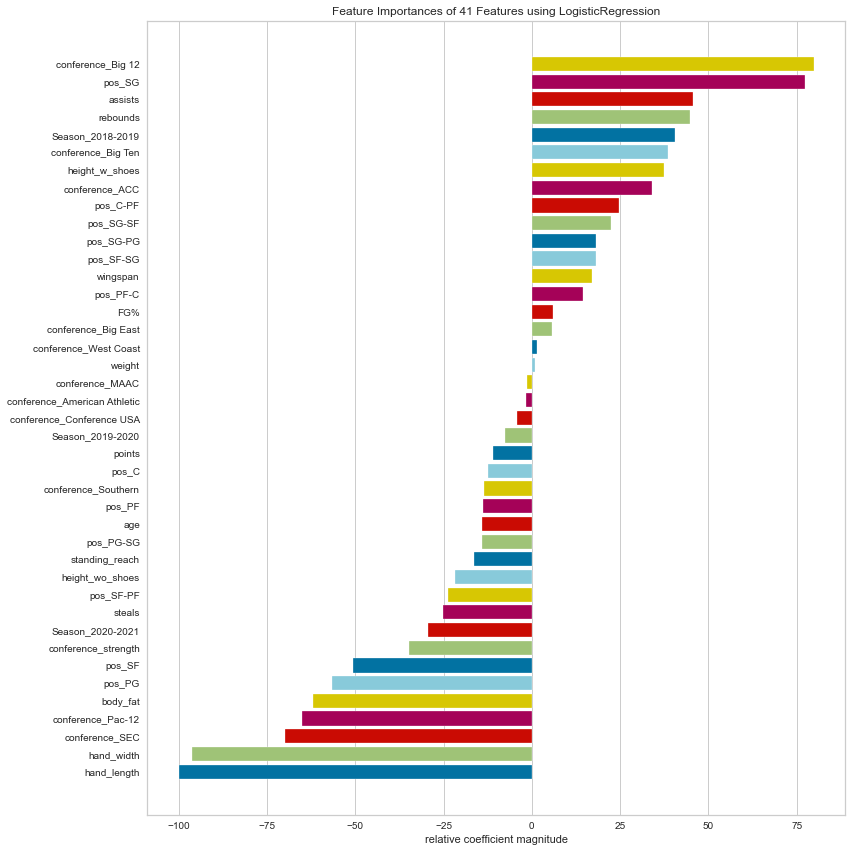

In [23]:
from yellowbrick.classifier import ROCAUC
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.model_selection import FeatureImportances
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors, preprocessing, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

predictors = ['body_fat','hand_length','hand_width','height_wo_shoes','height_w_shoes','standing_reach','weight','wingspan',
         'age','conference_strength','points','rebounds','assists','steals','FG%','Season_2018-2019','Season_2019-2020',
 'Season_2020-2021',
 'pos_C',
 'pos_C-PF',
 'pos_PF',
 'pos_PF-C',
 'pos_PG',
 'pos_PG-SG',
 'pos_SF',
 'pos_SF-PF',
 'pos_SF-SG',
 'pos_SG',
 'pos_SG-PG',
 'pos_SG-SF',
 'conference_ACC',
 'conference_American Athletic',
 'conference_Big 12',
 'conference_Big East',
 'conference_Big Ten',
 'conference_Conference USA',
 'conference_MAAC',
 'conference_Pac-12',
 'conference_SEC',
 'conference_Southern',
 'conference_West Coast']
X = df2[predictors]
y = df2.draft

lr = LogisticRegression(random_state=42)
fig, ax = plt.subplots(figsize=(12, 12))
fi_viz = FeatureImportances(lr)
fi_viz.fit(X, y)
fi_viz.poof()

According to the plot above, the top features: 

- conference_Big 12
- pos_SG
- assists
- rebounds
- hand_length
- hand_width
- conference_SEC
- conference_Pac-12
- body_fat
- steals
- height_w_shoes


In [24]:
#Null error rate
NRE = df2.draft.value_counts()[1]/(df2.draft.value_counts()[0] + df2.draft.value_counts()[1])
Error_Rate = 1 - NRE
Error_Rate

0.32065217391304346

#Training null error rate
training1_NRE = y_train.value_counts()[1]/(y_train.value_counts()[0] + y_train.value_counts()[1])
Null_Error_Rate= 1 - training1_NRE
Null_Error_Rate

# Machine Learning Models 
### Model 1:  
#### Logistic Regression Model 1

In [25]:
#Define a vector containing the names of the attributes to use
predictors = ['pos_SG', 'assists', 'rebounds','hand_length','conference_Big 12'] 

X1 = df2[predictors]
y1 = df2.draft

#Use 33% data to train 
#Use random state number 20 to make sure result is fixed 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=20)

#Define the model type as logistic regression
model = LogisticRegression()

#Train the algorithm
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
model.score(X_train, y_train)

0.6910569105691057

In [34]:
#Predict class labels for the test set
predicted = model.predict(X_train)

#Generate class probabilities
probs = model.predict_proba(X_train)


In [39]:
#Generate evaluation metrics
from sklearn import metrics
p1 = precision_score(y_train, predicted)
f1 = f1_score(y_train, predicted)
a1 = model.score(X_train, y_train)
c1 = metrics.confusion_matrix(y_train, predicted)
cf1 = metrics.classification_report(y_train, predicted)

print("Precision:", p1) 
print("F1 score:", f1) 
print("Accuracy:", a1)
print("Classification Report:", cf1)
print("Confusion Matrix:", c1)

Precision: 0.711340206185567
F1 score: 0.7840909090909092
Accuracy: 0.6910569105691057
Classification Report:               precision    recall  f1-score   support

           0       0.62      0.36      0.46        44
           1       0.71      0.87      0.78        79

    accuracy                           0.69       123
   macro avg       0.66      0.62      0.62       123
weighted avg       0.68      0.69      0.67       123

Confusion Matrix: [[16 28]
 [10 69]]


In [41]:
#Evaluate the model using 10-fold cross-validation
scores1 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10)
print(scores1)
cv1 = scores1.mean()
print("cv1_scores_mean:", cv1)

[0.69230769 0.61538462 0.61538462 0.58333333 0.83333333 0.75
 0.66666667 0.66666667 0.83333333 0.66666667]
cv1_scores_mean: 0.6923076923076923


### Model 2:  
#### Logistic Regression Model 2

In [61]:
#Define a vector containing the names of the attributes to use
predictors = ['pos_SG', 'assists', 'steals','hand_length','conference_strength','body_fat','conference_Big Ten'] 

X2 = df2[predictors]
y2 = df2.draft

#Use 33% data to train 
#Use random state number 20 to make sure result is fixed 
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=20)

#Define the model type as logistic regression
model = LogisticRegression()

#Train the algorithm
model.fit(X_train, y_train)

LogisticRegression()

In [62]:
model.score(X_train, y_train)

0.7235772357723578

In [63]:
#Predict class labels for the test set
predicted = model.predict(X_train)

#Generate class probabilities
probs = model.predict_proba(X_train)

In [68]:
#Generate evaluation metrics
from sklearn import metrics
p2 = precision_score(y_train, predicted)
f2 = f1_score(y_train, predicted)
a2 = model.score(X_train, y_train)
c2 = metrics.confusion_matrix(y_train, predicted)
cf2 = metrics.classification_report(y_train, predicted)

print("Classification Report:", cf2)
print("Confusion Matrix:", c2)
print("Precision:", p2) 
print("F1 score:", f2) 
print("Accuracy:", a2)


Classification Report:               precision    recall  f1-score   support

           0       0.68      0.43      0.53        44
           1       0.74      0.89      0.80        79

    accuracy                           0.72       123
   macro avg       0.71      0.66      0.67       123
weighted avg       0.72      0.72      0.71       123

Confusion Matrix: [[19 25]
 [ 9 70]]
Precision: 0.7368421052631579
F1 score: 0.8045977011494253
Accuracy: 0.7235772357723578


In [65]:
#Evaluate the model using 10-fold cross-validation
scores2 = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10)
print(scores2)
cv2 = scores2.mean()
print("cv1_scores_mean:", cv2)

[0.84615385 0.61538462 0.69230769 0.75       0.58333333 0.66666667
 0.66666667 0.66666667 0.83333333 0.5       ]
cv1_scores_mean: 0.6820512820512821


### Model 3:
#### SVM model 1

In [49]:
#Define a vector containing the names of the attributes to use. For this model, we will use the top 3 categorical features
#chosen by logistic regression feature selection, and turnover_B which seems to be predictive of TARGET
#based on our EDA.
predictors = ['pos_SG', 'assists', 'rebounds','hand_length','conference_Big 12'] 

#Response and explanatory variables
X3 = df2[predictors]
y3 = df2.draft


#Prepare data for classification process, use 2/3rds of the data to train, 1/3rd to test, random state of 20.
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.33, random_state=20)

#Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X3_train = scaler.transform(X_train)
X3_test = scaler.transform(X_test)

In [67]:
from sklearn.svm import SVC

clf1=SVC(random_state = 42, C = 100, gamma = 0.1, kernel = "rbf")
clf1.fit(X3_train, y_train)
clf1.score(X3_train, y_train)

#Print metrics
y3_train_pred = clf1.predict(X3_train)

print("Classification Report",classification_report(y_train, y3_train_pred))
print("Confusion matrix",confusion_matrix(y_train, y3_train_pred))

p3 = precision_score(y_train, y3_train_pred)
f3 = f1_score(y_train, y3_train_pred)
a3 = metrics.accuracy_score(y_train, y3_train_pred)

print("Precision:", p3)
print("F1 score:", f3) 
print("Accuracy:", a3)

Classification Report               precision    recall  f1-score   support

           0       0.80      0.64      0.71        44
           1       0.82      0.91      0.86        79

    accuracy                           0.81       123
   macro avg       0.81      0.77      0.79       123
weighted avg       0.81      0.81      0.81       123

Confusion matrix [[28 16]
 [ 7 72]]
Precision: 0.8181818181818182
F1 score: 0.8622754491017964
Accuracy: 0.8130081300813008


In [55]:
#Evaluate the model using 10-fold cross-validation
scores3 = cross_val_score(clf1, X3_train, y_train, scoring='accuracy', cv=10)
print(scores3)
cv3 = scores3.mean()
print("cv_scores_mean:", cv3)

[0.69230769 0.46153846 0.76923077 0.66666667 0.66666667 0.75
 0.58333333 0.58333333 0.66666667 0.75      ]
cv_scores_mean: 0.658974358974359


### Model 4:
#### SVM model 2

In [71]:
predictors = ['pos_SG', 'assists', 'steals','hand_length','conference_strength','body_fat','conference_Big Ten'] 

#Response and explanatory variables
X4 = df2[predictors]
y4 = df2.draft


#Prepare data for classification process, use 2/3rds of the data to train, 1/3rd to test, random state of 20.
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.33, random_state=20)

#Standardize the data
scaler = StandardScaler()
scaler.fit(X_train)
X4_train = scaler.transform(X_train)
X4_test = scaler.transform(X_test)

In [72]:

clf2=SVC(random_state = 42, C = 100, gamma = 0.1, kernel = "rbf")
clf2.fit(X4_train, y_train)
clf2.score(X4_train, y_train)

#Print metrics
y4_train_pred = clf2.predict(X4_train)

print("Classification Report",classification_report(y_train, y4_train_pred))
print("Confusion matrix",confusion_matrix(y_train, y4_train_pred))

p4 = precision_score(y_train, y4_train_pred)
f4 = f1_score(y_train, y4_train_pred)
a4 = metrics.accuracy_score(y_train, y4_train_pred)

print("Precision:", p3)
print("F1 score:", f3) 
print("Accuracy:", a3)

Classification Report               precision    recall  f1-score   support

           0       0.95      0.84      0.89        44
           1       0.92      0.97      0.94        79

    accuracy                           0.93       123
   macro avg       0.93      0.91      0.92       123
weighted avg       0.93      0.93      0.93       123

Confusion matrix [[37  7]
 [ 2 77]]
Precision: 0.8181818181818182
F1 score: 0.8622754491017964
Accuracy: 0.8130081300813008


In [73]:
#Evaluate the model using 10-fold cross-validation
scores4 = cross_val_score(clf2, X4_train, y_train, scoring='accuracy', cv=10)
print(scores4)
cv4 = scores4.mean()
print("cv_scores_mean:", cv4)

[0.69230769 0.69230769 0.38461538 0.66666667 0.75       0.58333333
 0.66666667 0.75       0.5        0.5       ]
cv_scores_mean: 0.6185897435897436


### KNN Models

In [ ]:
#Define a vector containing the names of the attributes to use. For this model, we will use the top 5 categorical features
#selected by logistic regression feature selection and the two turnover variables which seems to be predictive of TARGET
#based on our EDA.
predictors = ['typeA_0', 'typeB_0', 'prod_B', 'prod_A', 'typeA_3', 'turnover_A','turnover_B'] 

#Response and explanatory variables
X1 = df3[predictors]
y1 = df3.TARGET

#Apply SMOTE
X1, y1  = SMOTE().fit_resample(df3[predictors], df3.TARGET)

#Prepare data for classification process, use 2/3rds of the data to train, 1/3rd to test, random state of 20.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=20)

#Create a model
KNN_Classifier = KNeighborsClassifier(n_neighbors = 5, p=2, metric = 'euclidean')

#Train the model
KNN_Classifier.fit(X1_train, y1_train)

In [ ]:
#Let's predict the classes for training data
y1_train_pred = KNN_Classifier.predict(X1_train)

In [ ]:
#Show classification metrics, confusion matrix, f1 score, and score of how well our classifier did.

print(metrics.classification_report(y1_train, y1_train_pred))
print(confusion_matrix(y1_train, y1_train_pred))

p1 = precision_score(y1_train, y1_train_pred)
f1 = f1_score(y1_train, y1_train_pred)
a1 = KNN_Classifier.score(X1_train, y1_train)

print("Precision:", p1) 
print("F1 score:", f1) 
print("Accuracy:", a1)

In [ ]:
#Evaluate the model using 10-fold cross-validation
#K is often set to a value of 5 or 10 since these values have been shown to produce testing error rate estimates that 
#exhibit neither high bias nor very high variance (see "An Introduction to Statistical Learning", page 184, James, Witten, 
#Hastie, and Tibshirani, ISBN-13: 978-1461471370).  We will use 10 for our K-fold cross validation testing.

from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN_Classifier, X1_train, y1_train, scoring='accuracy', cv=10)
print(scores)
cv1 = scores.mean()
print("cv_scores_mean:", cv1)

### Decision Tree

### Random Forest

## Model Selection